In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


In [5]:
data.isnull().sum()

ticker                   0
name                     0
currency                 0
exchange                 0
industry                13
logo                    20
weburl                  16
environment_grade        0
environment_level        0
social_grade             0
social_level             0
governance_grade         0
governance_level         0
environment_score        0
social_score             0
governance_score         0
total_score              0
last_processing_date     0
total_grade              0
total_level              0
cik                      0
dtype: int64

In [6]:
data.dropna(subset=['industry'], inplace=True)

In [7]:
data.columns

Index(['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl',
       'environment_grade', 'environment_level', 'social_grade',
       'social_level', 'governance_grade', 'governance_level',
       'environment_score', 'social_score', 'governance_score', 'total_score',
       'last_processing_date', 'total_grade', 'total_level', 'cik'],
      dtype='object')

In [8]:
data.dtypes

ticker                  object
name                    object
currency                object
exchange                object
industry                object
logo                    object
weburl                  object
environment_grade       object
environment_level       object
social_grade            object
social_level            object
governance_grade        object
governance_level        object
environment_score        int64
social_score             int64
governance_score         int64
total_score              int64
last_processing_date    object
total_grade             object
total_level             object
cik                      int64
dtype: object

In [9]:
data[data['industry'].isnull()]

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik


In [10]:
#checando se há dados duplicados
data[data.duplicated()]

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik


In [11]:
data['total_grade'].unique()

array(['BBB', 'BB', 'A', 'B'], dtype=object)

In [12]:
data['industry'].unique()

array(['Media', 'Automobiles', 'Trading Companies and Distributors',
       'Consumer products', 'Hotels Restaurants and Leisure',
       'Diversified Consumer Services', 'Airlines', 'Insurance',
       'Communications', 'Building', 'Technology', 'Electrical Equipment',
       'Logistics and Transportation', 'Biotechnology', 'Health Care',
       'Life Sciences Tools and Services', 'Banking', 'Semiconductors',
       'Pharmaceuticals', 'Financial Services',
       'Commercial Services and Supplies', 'Chemicals', 'Real Estate',
       'Utilities', 'Machinery', 'Food Products', 'Retail', 'Energy',
       'Road and Rail', 'Distributors', 'Beverages', 'Telecommunication',
       'Professional Services', 'Auto Components', 'Packaging',
       'Aerospace and Defense', 'Tobacco', 'Metals and Mining',
       'Construction', 'Textiles Apparel and Luxury Goods',
       'Industrial Conglomerates', 'Leisure Products', 'Marine',
       'Hotels, Restaurants & Leisure', 'Metals & Mining', 'Energy ',


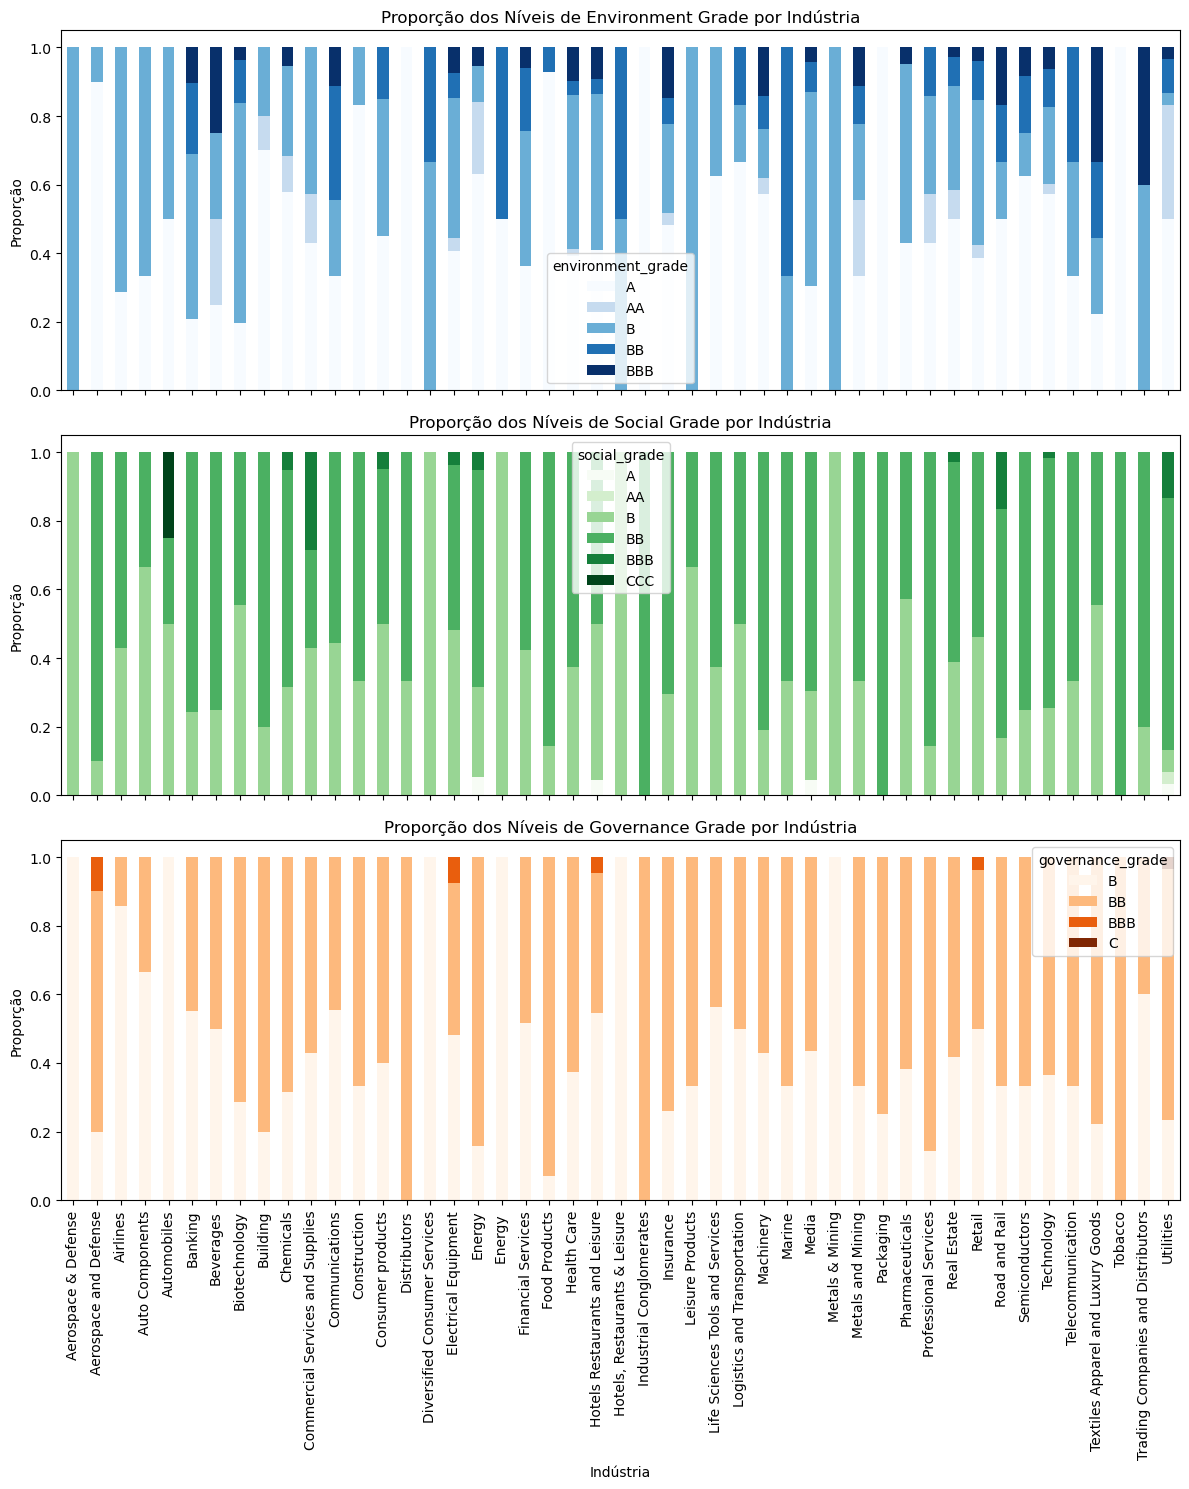

In [13]:
import matplotlib.pyplot as plt

# Preparar o dataset para visualização das proporções
industry_env = data.groupby(['industry', 'environment_grade']).size().unstack().fillna(0)
industry_soc = data.groupby(['industry', 'social_grade']).size().unstack().fillna(0)
industry_gov = data.groupby(['industry', 'governance_grade']).size().unstack().fillna(0)

# Plotar os três gráficos em um layout
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
industry_env.div(industry_env.sum(axis=1), axis=0).plot(kind="bar", stacked=True, ax=axes[0], colormap="Blues")
axes[0].set_title('Proporção dos Níveis de Environment Grade por Indústria')
axes[0].set_ylabel('Proporção')

industry_soc.div(industry_soc.sum(axis=1), axis=0).plot(kind="bar", stacked=True, ax=axes[1], colormap="Greens")
axes[1].set_title('Proporção dos Níveis de Social Grade por Indústria')
axes[1].set_ylabel('Proporção')

industry_gov.div(industry_gov.sum(axis=1), axis=0).plot(kind="bar", stacked=True, ax=axes[2], colormap="Oranges")
axes[2].set_title('Proporção dos Níveis de Governance Grade por Indústria')
axes[2].set_ylabel('Proporção')
axes[2].set_xlabel('Indústria')

plt.tight_layout()
plt.show()



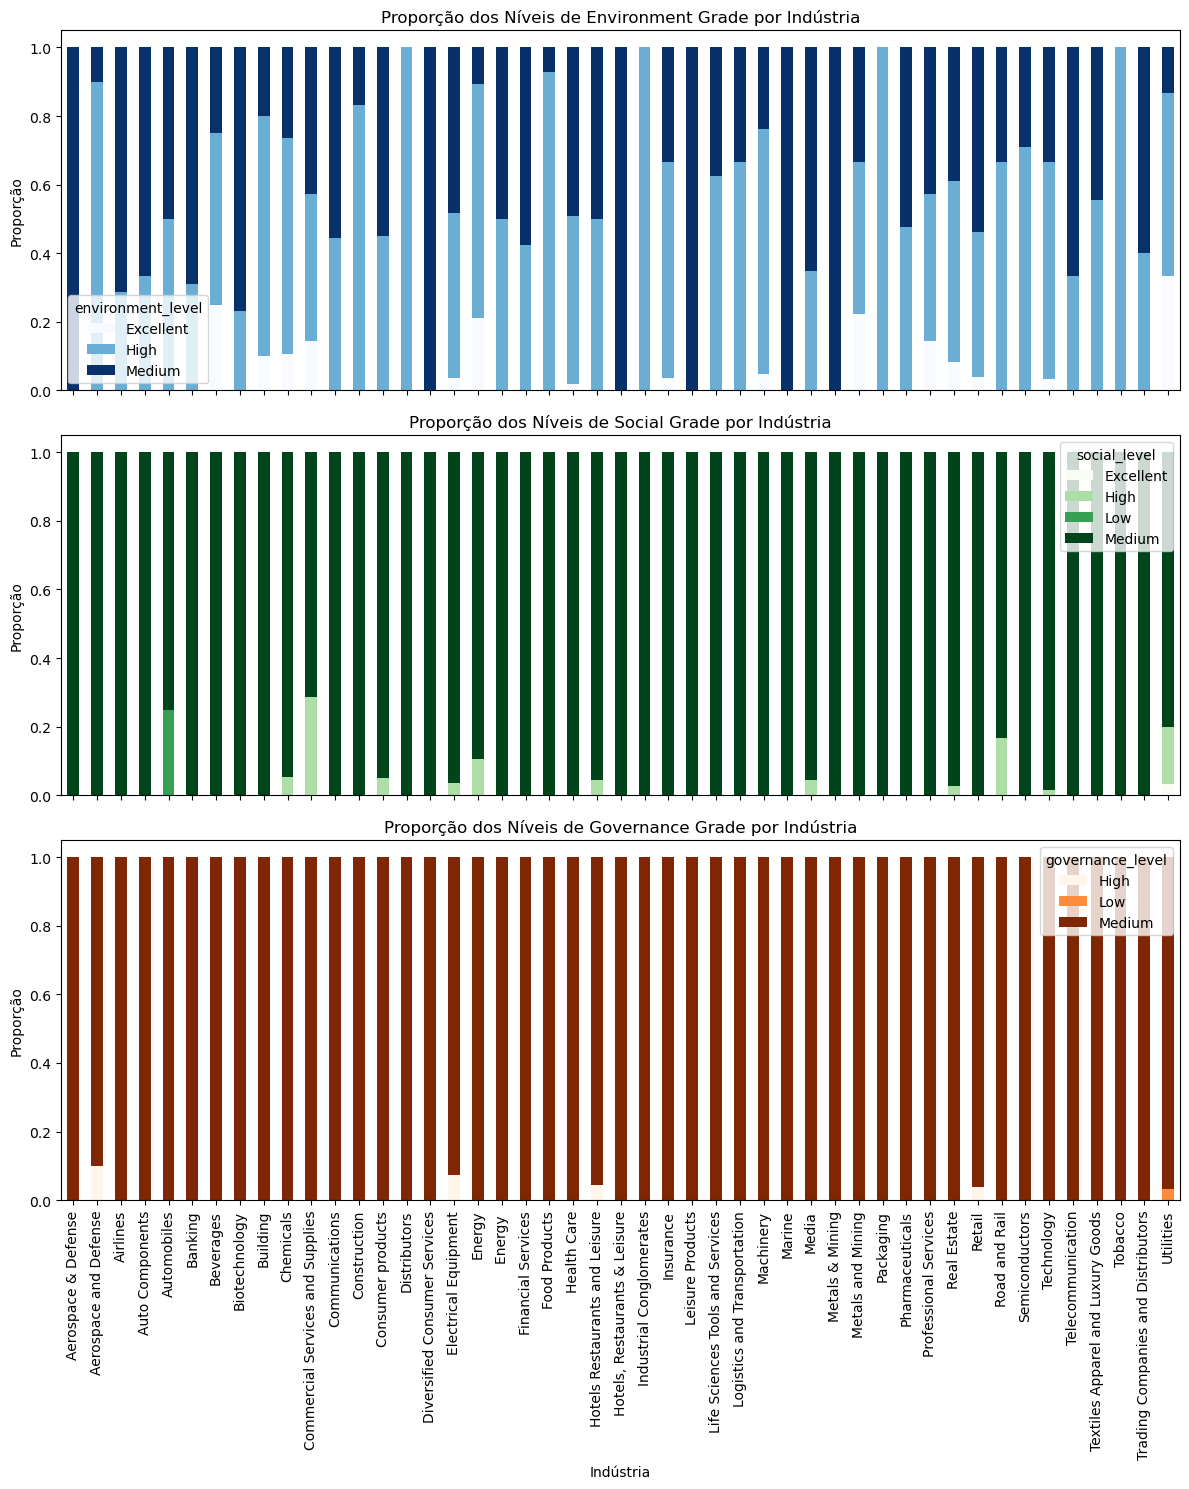

In [14]:
# visualização das proporções
industry_env = data.groupby(['industry', 'environment_level']).size().unstack().fillna(0)
industry_soc = data.groupby(['industry', 'social_level']).size().unstack().fillna(0)
industry_gov = data.groupby(['industry', 'governance_level']).size().unstack().fillna(0)

# layout
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
industry_env.div(industry_env.sum(axis=1), axis=0).plot(kind="bar", stacked=True, ax=axes[0], colormap="Blues")
axes[0].set_title('Proporção dos Níveis de Environment Grade por Indústria')
axes[0].set_ylabel('Proporção')

industry_soc.div(industry_soc.sum(axis=1), axis=0).plot(kind="bar", stacked=True, ax=axes[1], colormap="Greens")
axes[1].set_title('Proporção dos Níveis de Social Grade por Indústria')
axes[1].set_ylabel('Proporção')

industry_gov.div(industry_gov.sum(axis=1), axis=0).plot(kind="bar", stacked=True, ax=axes[2], colormap="Oranges")
axes[2].set_title('Proporção dos Níveis de Governance Grade por Indústria')
axes[2].set_ylabel('Proporção')
axes[2].set_xlabel('Indústria')

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


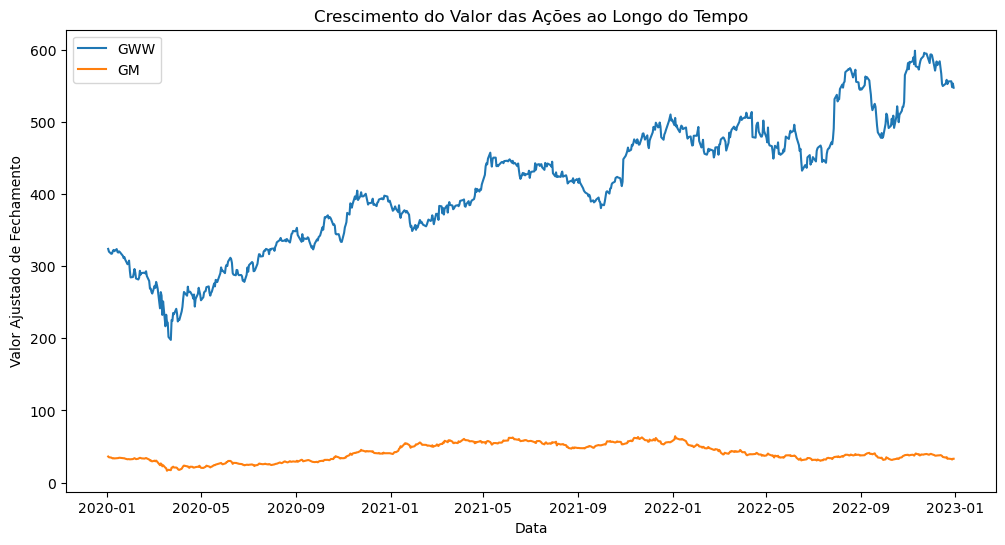

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados de duas empresas pelo ticker (substitua pelos tickers desejados)
empresa1 = yf.download("GWW", start="2020-01-01", end="2023-01-01")
empresa2 = yf.download("GM", start="2020-01-01", end="2023-01-01")

# Plotar o gráfico de crescimento de valor das ações
plt.figure(figsize=(12, 6))
plt.plot(empresa1['Adj Close'], label="GWW")
plt.plot(empresa2['Adj Close'], label="GM")
plt.title("Crescimento do Valor das Ações ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Valor Ajustado de Fechamento")
plt.legend()
plt.show()


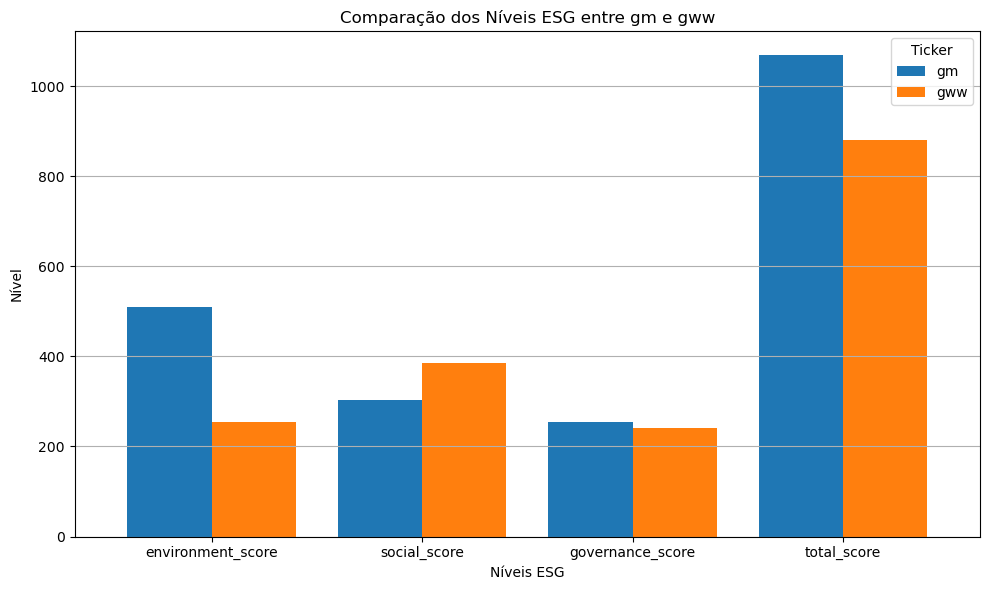

In [16]:


# usando como exemplo os tickers GM e gww
comparison_df = data[data['ticker'].isin(['gm', 'gww'])]

# colocando apenas as colunas que eu tenho interesse
comparison_df = comparison_df.set_index('ticker')[['environment_score', 'social_score', 'governance_score', 'total_score']].T

# Criando o gráfico de barras
comparison_df.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Comparação dos Níveis ESG entre gm e gww')
plt.ylabel('Nível')
plt.xlabel('Níveis ESG')
plt.xticks(rotation=0)  # Manter os níveis na horizontal
plt.legend(title='Ticker')
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()


Comparação usando duas empresas diferentes e as relações de níveis ESG e crescimento no valor na bolsa - 
WW Grainger Inc e General Motors Company BDR

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


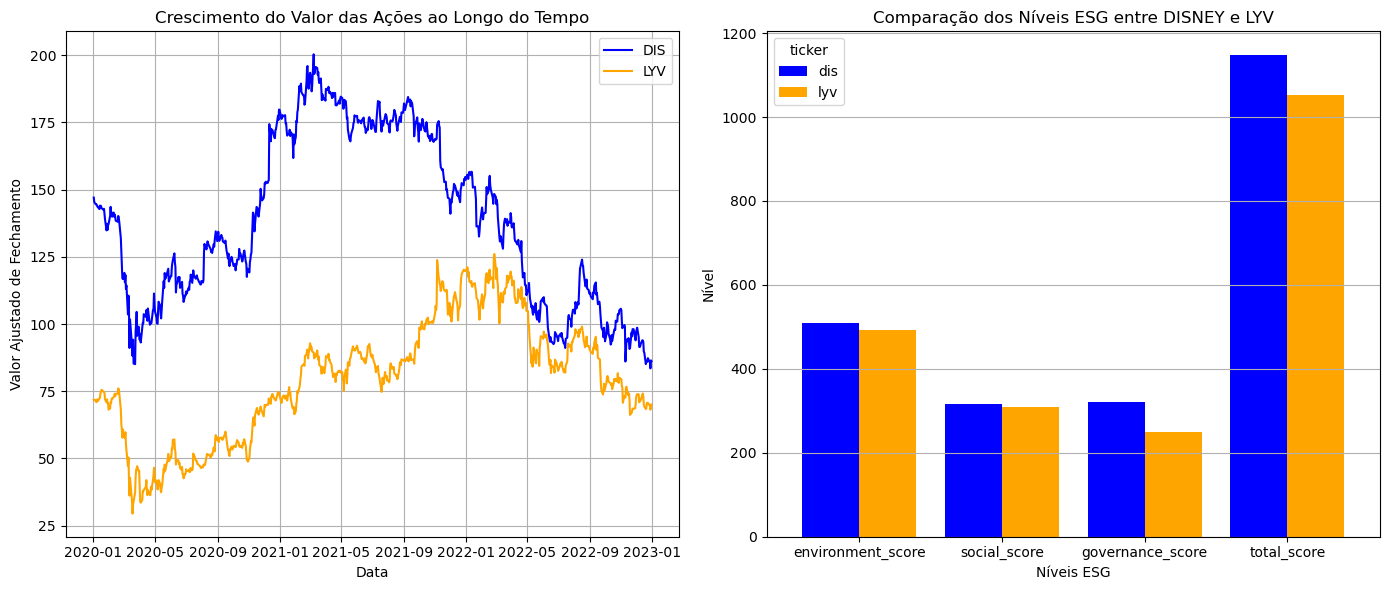

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Baixar dados de duas empresas pelo ticker (substitua pelos tickers desejados)
empresa1 = yf.download("DIS", start="2020-01-01", end="2023-01-01")
empresa2 = yf.download("LYV", start="2020-01-01", end="2023-01-01")

# Carregue seu dataset ESG
# df = pd.read_csv('seu_dataset.csv')  # Descomente e ajuste para seu arquivo

# Filtrando os dados para GM e GWW
comparison_df = data[data['ticker'].isin(['dis', 'lyv'])]

# Selecionando apenas as colunas de interesse e transpondo
comparison_df = comparison_df.set_index('ticker')[['environment_score', 'social_score', 'governance_score', 'total_score']].T

# Definindo cores para cada empresa
colors = {'DIS': 'blue', 'LYV': 'orange'}

# Criando os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Crescimento de Valor das Ações
axs[0].plot(empresa1['Adj Close'], label="DIS", color=colors['DIS'])
axs[0].plot(empresa2['Adj Close'], label="LYV", color=colors['LYV'])
axs[0].set_title("Crescimento do Valor das Ações ao Longo do Tempo")
axs[0].set_xlabel("Data")
axs[0].set_ylabel("Valor Ajustado de Fechamento")
axs[0].legend()
axs[0].grid()

# Gráfico de Níveis ESG
comparison_df.plot(kind='bar', ax=axs[1], color=[colors['DIS'], colors['LYV']], width=0.8)
axs[1].set_title('Comparação dos Níveis ESG entre DISNEY e LYV')
axs[1].set_ylabel('Nível')
axs[1].set_xlabel('Níveis ESG')
axs[1].tick_params(axis='x', rotation=0)  # Manter os níveis na horizontal
axs[1].grid(axis='y')

# Ajustar layout
plt.tight_layout()
plt.show()


Usuário podendo escolher quais empresas comparar por meio de seus tickers

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


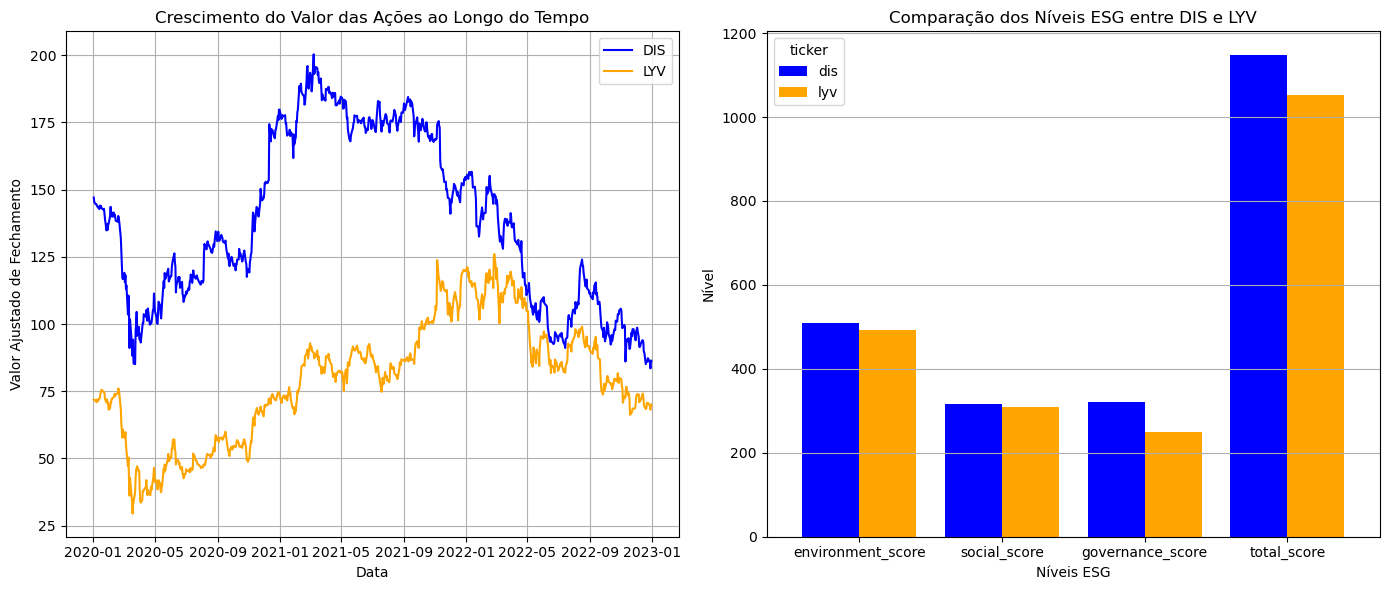

In [18]:


# solicitando os tickers
ticker1 = input("Digite o ticker da primeira empresa (ex: DIS): ").strip().upper()
ticker2 = input("Digite o ticker da segunda empresa (ex: LYV): ").strip().upper()

# baixando das empresas pelo ticker
empresa1 = yf.download(ticker1, start="2020-01-01", end="2023-01-01")
empresa2 = yf.download(ticker2, start="2020-01-01", end="2023-01-01")


# filtrando os dados para os tickers inseridos
comparison_df = data[data['ticker'].isin([ticker1.lower(), ticker2.lower()])]

# apenas colunas de interesse
comparison_df = comparison_df.set_index('ticker')[['environment_score', 'social_score', 'governance_score', 'total_score']].T

# uma cor para cada empresa
colors = {ticker1: 'blue', ticker2: 'orange'}


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot de crescimento de valor nas ações
axs[0].plot(empresa1['Adj Close'], label=ticker1, color=colors[ticker1])
axs[0].plot(empresa2['Adj Close'], label=ticker2, color=colors[ticker2])
axs[0].set_title("Crescimento do Valor das Ações ao Longo do Tempo")
axs[0].set_xlabel("Data")
axs[0].set_ylabel("Valor Ajustado de Fechamento")
axs[0].legend()
axs[0].grid()

# Gplot de níveis esg
comparison_df.plot(kind='bar', ax=axs[1], color=[colors[ticker1], colors[ticker2]], width=0.8)
axs[1].set_title(f'Comparação dos Níveis ESG entre {ticker1} e {ticker2}')
axs[1].set_ylabel('Nível')
axs[1].set_xlabel('Níveis ESG')
axs[1].tick_params(axis='x', rotation=0)  # Manter os níveis na horizontal
axs[1].grid(axis='y')



plt.tight_layout()
plt.show()


In [19]:
# colocando os ticker em uma lista
tickers = data['ticker'].unique().tolist()  
tickers = [ticker.upper() for ticker in tickers]  


print(tickers)

['DIS', 'GM', 'GWW', 'MHK', 'LYV', 'LVS', 'CLX', 'AACG', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AATC', 'AAWW', 'AADI', 'ABEO', 'ABNB', 'ABIO', 'ABMD', 'ABOS', 'ABSI', 'ABTX', 'ABUS', 'ABVC', 'ACAD', 'ACCD', 'ACET', 'ABCL', 'ABCB', 'ACHL', 'ACHC', 'ACIW', 'ACLS', 'ACIU', 'ACHV', 'ACMR', 'ACOR', 'ACNB', 'ACRS', 'ACRX', 'ACT', 'ACTG', 'ACVA', 'ADAG', 'ACXP', 'ADBE', 'ADAP', 'ADMA', 'ADES', 'ADI', 'ADIL', 'ADMP', 'ACER', 'ADUS', 'ACGL', 'ADPT', 'ADSK', 'ADP', 'ADTX', 'ADV', 'ADVM', 'AEHR', 'AEHL', 'AEI', 'AEIS', 'AEP', 'AEMD', 'AESE', 'AEYE', 'AERI', 'AEY', 'AFMD', 'AFCG', 'AFBI', 'AFRM', 'AFIB', 'AGEN', 'AFYA', 'AGFS', 'AGFY', 'AGIL', 'AGMH', 'AGIO', 'AGLE', 'AGNC', 'AGRI', 'AGRX', 'AGYS', 'AGTC', 'AHCO', 'AHPI', 'ADTN', 'ADN', 'AIKI', 'AIP', 'AKRO', 'AIRT', 'AIMC', 'AKBA', 'AIRG', 'AIRS', 'AKAM', 'AKU', 'AKUS', 'AKTS', 'AKTX', 'ALBO', 'AKYA', 'ALCO', 'ALDX', 'ALEC', 'ALGM', 'ALF', 'ALGN', 'ALGS', 'ALKS', 'ALIM', 'ALGT', 'AIH', 'ALKT', 'ALNY', 'ALLT', 'ALLO', 'AMAT', 'AMD', 'ATVI', 'AVGO

In [20]:
# dados financeiros usando yfinance
# esoeficando um intervalo que esteja proximo do dataset esg
data_fin = yf.download(tickers, start='2020-01-01', end='2024-01-01')

print(data_fin.head())

[*********************100%***********************]  709 of 709 completed

65 Failed downloads:
['SIVB', 'ACER', 'AHPI', 'MTCR', 'EVK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-01-01)')
['SIEN', 'FBHS', 'ACRX', 'MYMD', 'AAWW', 'WRK', 'FLT', 'HCCI', 'TRTN', 'GPS', 'UTME', 'HEP', 'HARP', 'PEAK', 'WWE', 'ZEN', 'FRC', 'HHC', 'PXD', 'CDAY', 'CLXT', 'AGFS', 'CLSN', 'AGRX', 'AIMC', 'ATVI', 'ADES', 'AGTC', 'HAPP', 'AIH', 'AIKI', 'NLOK', 'AKUS', 'XL', 'DISH', 'ABTX', 'AKU', 'AESE', 'AGLE', 'NLSN', 'AGIL', 'DRE', 'ALBO', 'HCDI', 'ACOR', 'ABMD', 'PKI', 'RE', 'CLVS', 'ADMP', 'PNT', 'AERI', 'AEY', 'USAK', 'ABC', 'CTXS', 'ABIO', 'ZEV']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['Y']: %ticker%FTzMissingError('$%ticker%: possibly delisted; no timezone found')
['ALF']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 

Price                      Adj Close                                           \
Ticker                             A  AACG   AADI        AAL      AAME   AAOI   
Date                                                                            
2020-01-02 00:00:00+00:00  83.347336  1.35  9.600  28.982893  1.929832  12.50   
2020-01-03 00:00:00+00:00  82.009140  1.47  9.600  27.548195  1.978320  12.12   
2020-01-06 00:00:00+00:00  82.251556  1.43  9.720  27.219410  1.803762  12.15   
2020-01-07 00:00:00+00:00  82.503700  1.43  9.945  27.119778  1.745576  12.43   
2020-01-08 00:00:00+00:00  83.318253  1.51  9.255  27.737495  1.842553  12.70   

Price                                                                  ...  \
Ticker                          AAON         AAP       AAPL      AATC  ...   
Date                                                                   ...   
2020-01-02 00:00:00+00:00  32.398186  144.599075  72.876106  2.957820  ...   
2020-01-03 00:00:00+00:00  32.696899  1

In [21]:
#  retornos diários a partir do preço ajustado
returns = data_fin['Adj Close'].pct_change()  # essa é a variação percentual
print(returns.head())


Ticker                            A      AACG      AADI       AAL      AAME  \
Date                                                                          
2020-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-03 00:00:00+00:00 -0.016056  0.088889  0.000000 -0.049502  0.025126   
2020-01-06 00:00:00+00:00  0.002956 -0.027211  0.012500 -0.011935 -0.088235   
2020-01-07 00:00:00+00:00  0.003066  0.000000  0.023148 -0.003660 -0.032258   
2020-01-08 00:00:00+00:00  0.009873  0.055944 -0.069382  0.022777  0.055556   

Ticker                         AAOI      AAON       AAP      AAPL      AATC  \
Date                                                                          
2020-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-03 00:00:00+00:00 -0.030400  0.009220  0.000063 -0.009722  0.008677   
2020-01-06 00:00:00+00:00  0.002475 -0.001787 -0.016435  0.007968 -0.019355   
2020-01-07 00:00:00+00:00  0.023045 -0.002189 -0.01

C:\Users\User\AppData\Local\Temp\ipykernel_17348\359193595.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data_fin['Adj Close'].pct_change()  # essa é a variação percentual


In [22]:
# Remover linhas com valores NaN nos retornos diários
returns_cleaned = returns.dropna(how="all", axis=0).dropna(how="all", axis=1)

# Filtrar para manter somente os tickers que estão em ambos os datasets
# Assumindo que seu dataset de ESG possui uma coluna 'ticker' com os tickers em letras minúsculas
# Transformamos os tickers de `returns_cleaned` para letras minúsculas
returns_cleaned.columns = returns_cleaned.columns.str.lower()

# Lista dos tickers presentes no seu dataset ESG
tickers_esg = data['ticker'].unique()  # Supondo que seu dataset de ESG esteja em `seu_dataset_esg`

# Filtrar os retornos para manter somente os tickers presentes no dataset ESG
returns_filtered = returns_cleaned.loc[:, returns_cleaned.columns.isin(tickers_esg)]

# Visualizar os primeiros dados dos retornos filtrados
print(returns_filtered.head())


Ticker                            a      aacg      aadi       aal      aame  \
Date                                                                          
2020-01-03 00:00:00+00:00 -0.016056  0.088889  0.000000 -0.049502  0.025126   
2020-01-06 00:00:00+00:00  0.002956 -0.027211  0.012500 -0.011935 -0.088235   
2020-01-07 00:00:00+00:00  0.003066  0.000000  0.023148 -0.003660 -0.032258   
2020-01-08 00:00:00+00:00  0.009873  0.055944 -0.069382  0.022777  0.055556   
2020-01-09 00:00:00+00:00  0.015712 -0.039735  0.025932  0.003951 -0.021053   

Ticker                         aaoi      aaon       aap      aapl      aatc  \
Date                                                                          
2020-01-03 00:00:00+00:00 -0.030400  0.009220  0.000063 -0.009722  0.008677   
2020-01-06 00:00:00+00:00  0.002475 -0.001787 -0.016435  0.007968 -0.019355   
2020-01-07 00:00:00+00:00  0.023045 -0.002189 -0.011862 -0.004703  0.015351   
2020-01-08 00:00:00+00:00  0.021722 -0.002792 -0.01

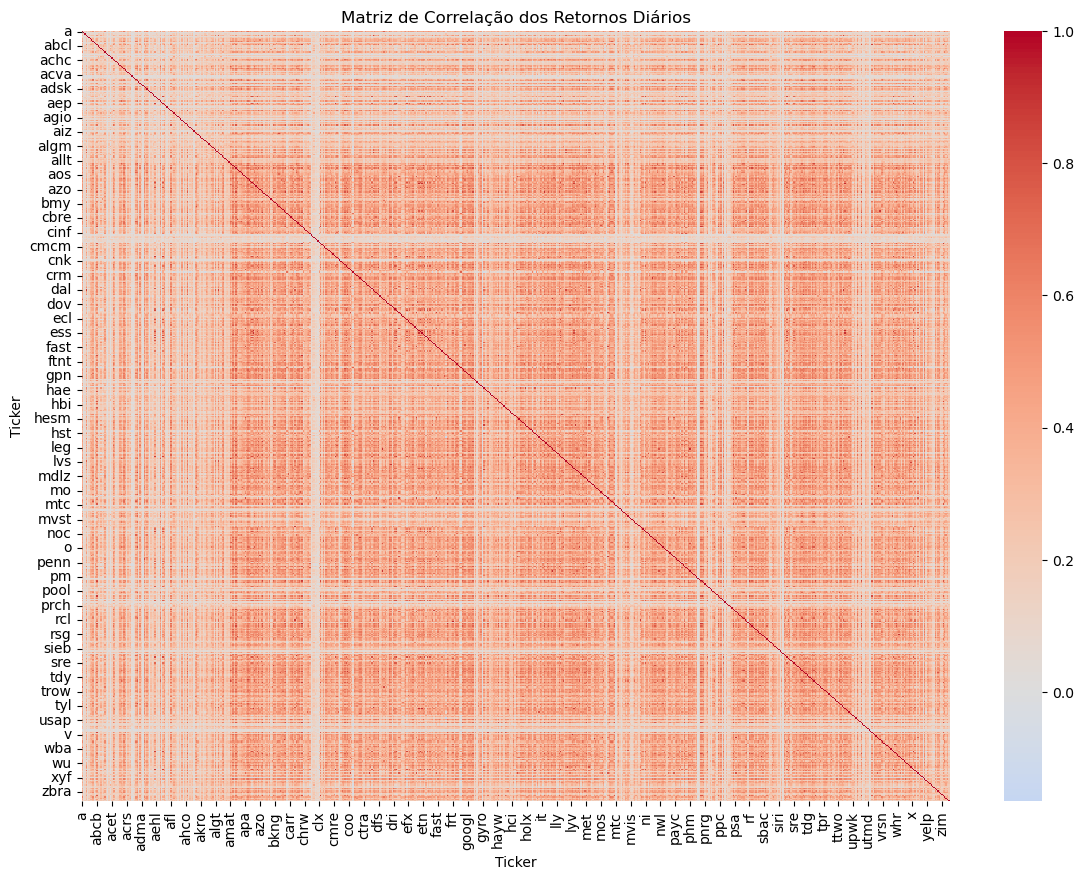

Correlações mais fortes (em módulo):
Ticker  Ticker
reg     frt       0.936739
frt     reg       0.936739
met     pru       0.935681
pru     met       0.935681
eqr     udr       0.935376
udr     eqr       0.935376
fitb    cfg       0.931658
cfg     fitb      0.931658
eqr     avb       0.929483
avb     eqr       0.929483
dtype: float64


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = returns_filtered.corr()

# Define um mapa de calor para visualizar as correlações
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title("Matriz de Correlação dos Retornos Diários")
plt.show()

# Exibe as correlações mais fortes (em módulo), ordenadas
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
print("Correlações mais fortes (em módulo):")
print(strong_correlations[strong_correlations < 1].head(10))


Fazendo correlação entre duas empresas por meio do input. Separar os tickers correpondentes por meio de vírgula e sem espaço

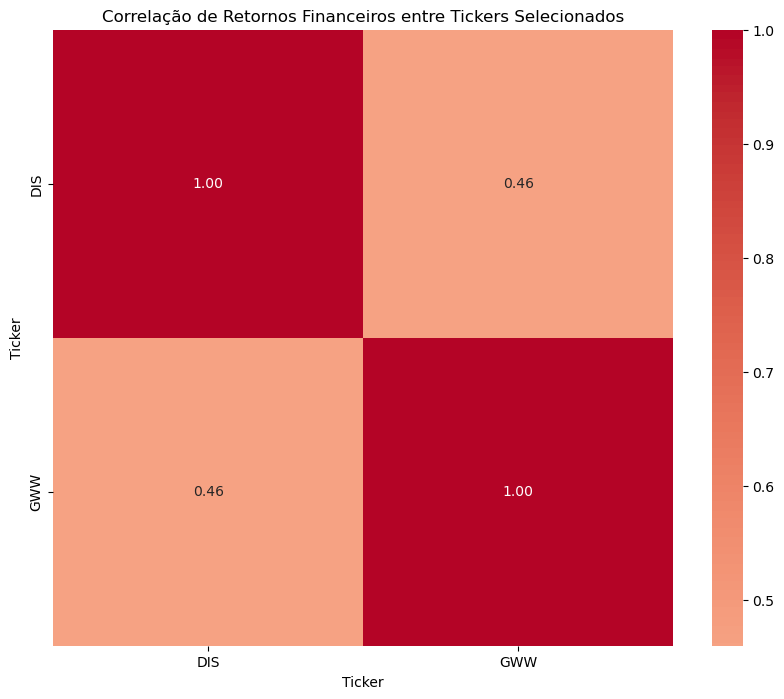

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Solicitar tickers específicos do usuário
selected_tickers = input("Digite os tickers que deseja analisar, separados por vírgula: ").upper().split(',')

# Filtrar os dados financeiros para apenas os tickers escolhidos
returns_selected = returns[selected_tickers]

# Calcular a matriz de correlação para os tickers selecionados
correlation_matrix = returns_selected.corr()

# Plotar o heatmap da correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlação de Retornos Financeiros entre Tickers Selecionados")
plt.show()


Interpretação do Gráfico de Correlação:
Valores de Correlação: A correlação varia de -1 a 1:

1: Correlação perfeita positiva (quando uma ação sobe, a outra também sobe na mesma proporção).
0: Sem correlação (não há relação linear entre os movimentos das duas ações).
-1: Correlação perfeita negativa (quando uma ação sobe, a outra desce na mesma proporção).
Correlações de 0,58: Esse valor sugere que, embora não seja uma relação perfeita, existe uma tendência de que, quando os retornos da DIS aumentam, os retornos da LYV também tendem a aumentar, e vice-versa. Essa relação pode ser influenciada por fatores comuns, como tendências do setor de entretenimento, sazonalidade ou eventos de mercado que afetam ambas as empresas.

Implicações:
Investimento: Para investidores, entender a correlação pode ajudar na diversificação da carteira. Se as ações são altamente correlacionadas, adicionar ambas à carteira pode não reduzir o risco, pois elas tendem a se mover juntas.

Análise de Risco: Se uma dessas empresas está exposta a um risco específico (por exemplo, mudanças na regulamentação de entretenimento), a outra pode ser afetada também, dado que elas têm uma correlação positiva.

Estratégias de Trading: Traders podem usar a correlação para identificar pares de ações que se comportam de maneira semelhante e podem ser negociados em conjunto, aproveitando as variações de preços relativas.




Usando a Apple para verificar o seu crescimento nos últimos 3 meses:

In [25]:

ticker = yf.Ticker("AAPL")
dados = ticker.history(period="3mo")

#média do preço de fechamento
media_preco_fechamento = dados['Close'].mean()

print(f"Média do preço de fechamento dos últimos 3 meses: {media_preco_fechamento:.2f}")


Média do preço de fechamento dos últimos 3 meses: 225.33


In [26]:
import yfinance as yf
import pandas as pd

# Lista de tickers que você deseja analisar
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'GM', 'GWW', 'LYV', 'DIS', 'CMG', 'DG']

# DataFrame para armazenar todos os preços de fechamento
todos_precos = pd.DataFrame()

# Iterando sobre os tickers para coletar os dados
for ticker in tickers:
    try:
        # Baixando os dados do ticker do yfinance
        ticker_data = yf.Ticker(ticker)
        dados = ticker_data.history(period="3mo")
        
        # Se houver dados, adicione a coluna 'Close' ao DataFrame
        if not dados.empty:
            todos_precos[ticker] = dados['Close']
        else:
            print(f"Dados não disponíveis para o ticker: {ticker}")
    
    except Exception as e:
        print(f"Erro ao processar o ticker {ticker}: {e}")

# Calculando a média geral, máximo e mínimo de todos os preços de fechamento
media_geral = todos_precos.mean().mean()  # Média de todas as médias
maximo_geral = todos_precos.max().max()    # Máximo de todos os máximos
minimo_geral = todos_precos.min().min()    # Mínimo de todos os mínimos

# Exibindo as estatísticas gerais
print(f"Média geral dos preços de fechamento: {media_geral:.2f}")
print(f"Máximo dos preços de fechamento: {maximo_geral:.2f}")
print(f"Mínimo dos preços de fechamento: {minimo_geral:.2f}")


Média geral dos preços de fechamento: 239.15
Máximo dos preços de fechamento: 1127.00
Mínimo dos preços de fechamento: 39.85


In [27]:
# Lista de tickers que você deseja filtrar
tickers = ['aapl', 'msft', 'googl', 'amzn', 'tsla', 'gm', 'gww', 'lyv', 'dis', 'cmg', 'dg']


# Filtrando o DataFrame para mostrar apenas os registros com os tickers desejados
filtered_info = data[data['ticker'].isin(tickers)]

# Exibindo as informações do registro para a coluna 'total_level'
total_levels = filtered_info[['ticker', 'total_level']]
print(total_levels)


    ticker total_level
0      dis        High
1       gm        High
2      gww      Medium
4      lyv        High
12    aapl      Medium
137   amzn        High
165  googl        High
176   msft        High
212   tsla        High
288     dg      Medium
289    cmg      Medium


In [28]:
import pandas as pd

# Supondo que 'data' seja o seu DataFrame original
# Selecionando 100 registros aleatórios
random_sample = data.sample(n=100, random_state=1)  # O random_state garante a reprodutibilidade

# Criando um novo DataFrame com apenas o ticker e 'total_level'
filtered_random_info = random_sample[['ticker', 'total_level']]

# Exibindo o novo DataFrame
print(filtered_random_info)

filtered_random_info['ticker']


    ticker total_level
197    reg        High
118   alec      Medium
559   spot        High
437    xom        High
678   usak        High
..     ...         ...
89    agle      Medium
598   yala      Medium
169   mdlz        High
90    agnc        High
709    hbb      Medium

[100 rows x 2 columns]


197     reg
118    alec
559    spot
437     xom
678    usak
       ... 
89     agle
598    yala
169    mdlz
90     agnc
709     hbb
Name: ticker, Length: 100, dtype: object

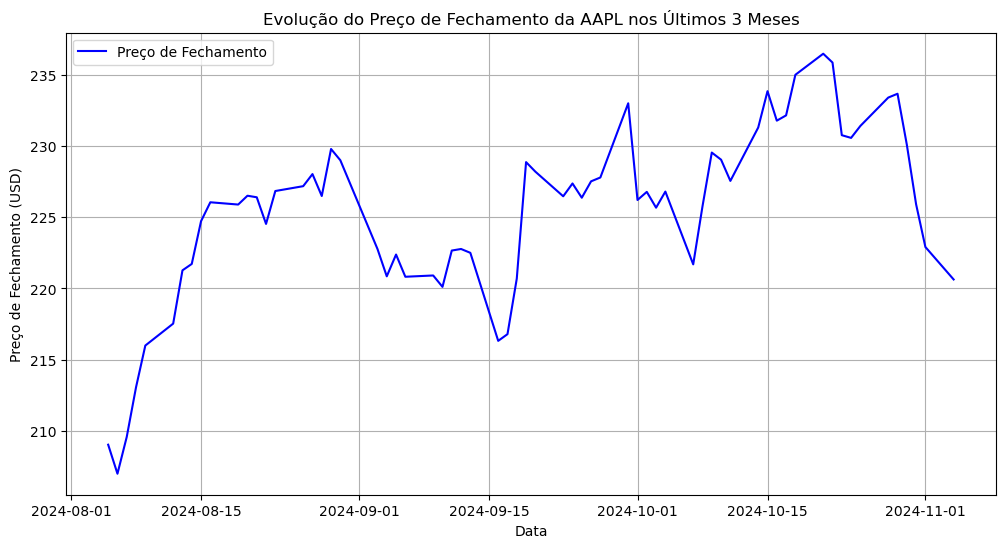

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixando dados de uma ação
ticker = yf.Ticker("AAPL")
dados = ticker.history(period="3mo")

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(dados.index, dados['Close'], label='Preço de Fechamento', color='blue')
plt.title('Evolução do Preço de Fechamento da AAPL nos Últimos 3 Meses')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [30]:
# Analisando o nível total de ESG da Apple
aapl_info = data[data['ticker'] == 'aapl']

# Exibindo as informações do registro
aapl_info['total_level']

12    Medium
Name: total_level, dtype: object

Após várias tentativas de fazer o merge entre os dados da biblioteca yfinance e o dataset de níveis ESG das empresas por meio de seus tickers, encontrei um dataset com as mesma informações em formato mais acessível. A partir do merge, agora efetivado, treinei o dataset novo com os valores dos níveis esg para estabelecer uma relação e predição com o preço maximo de cada uma das empresas na bolsa, enxugando o dataset para conter ticker únicos. 

O coeficiente de correlação ficou baixo em ambas as tentavivas, subindo um pouco apenas depois de estabelecer proporcionalidade entre valores; mas, mesmo assim, a relação entre essas variáveis ainda não expressou muita significância, o que atesta a necessidade de mais estudos que coreelacionem o índice de conformidade ESG das empresas com seus sucessos financeiros e ecnonômicos.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
esg_df = pd.read_csv('sp500_esg_data.csv')
price_df = pd.read_csv('sp500_price_data.csv')

In [33]:
price_df.head()

,Date,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WRB,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZTS
0,2023-01-03 00:00:00+00:00,150.039993,12.74,125.070000,162.380005,109.580002,62.459999,270.260010,336.920013,162.449997,...,48.386665,245.179993,30.860001,85.610001,70.070000,106.510002,110.760002,126.959999,127.279999,146.850006
1,2023-01-04 00:00:00+00:00,151.669998,13.59,126.360001,163.690002,111.209999,62.770000,269.339996,341.410004,165.910004,...,48.226665,246.490005,31.230000,90.900002,70.669998,106.820000,110.589996,128.679993,128.460007,148.960007
2,2023-01-05 00:00:00+00:00,152.110001,13.99,125.019997,163.490005,110.800003,62.939999,262.980011,328.440002,159.690002,...,47.919998,246.440002,30.299999,91.339996,69.239998,109.209999,107.449997,127.699997,126.080002,145.449997
3,2023-01-06 00:00:00+00:00,147.669998,14.18,129.619995,166.550003,112.330002,63.900002,269.209991,332.750000,165.520004,...,49.526669,253.429993,31.610001,93.570000,71.290001,110.529999,111.269997,130.289993,125.699997,147.639999
4,2023-01-09 00:00:00+00:00,147.470001,14.61,130.149994,161.660004,112.150002,62.669998,273.750000,341.980011,167.100006,...,48.653332,255.059998,31.420000,94.330002,71.980003,108.470001,111.790001,129.759995,126.050003,147.059998


In [34]:
# Convert Date column to datetime
price_df['Date'] = pd.to_datetime(price_df['Date'])

# Melt the price data to long format
price_long_df = price_df.melt(id_vars=['Date'], var_name='Symbol', value_name='Price')

# Merge ESG and Price data
merged_df = esg_df.merge(price_long_df, on='Symbol', how='inner')

In [35]:
price_long_df['Symbol'].unique()

array(['A', 'AAL', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ',
       'AJG', 'AKAM', 'ALB', 'ALL', 'ALLE', 'AMAT', 'AME', 'AMGN', 'AMP',
       'AMT', 'AMZN', 'ANET', 'ANSS', 'AOS', 'APA', 'APD', 'APH', 'APTV',
       'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA',
       'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB',
       'BIO', 'BK', 'BKNG', 'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BX',
       'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI',
       'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR',
       'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS',
       'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT',
       'CPT', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS',
       'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR',
       'DIS', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE', 'DUK'

In [36]:
merged_df.head()

,Symbol,Full Name,GICS Sector,GICS Sub-Industry,environmentScore,socialScore,governanceScore,totalEsg,highestControversy,percentile,ratingYear,ratingMonth,marketCap,beta,overallRisk,Date,Price
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.1,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8,2023-01-03 00:00:00+00:00,150.039993
1,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.1,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8,2023-01-04 00:00:00+00:00,151.669998
2,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.1,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8,2023-01-05 00:00:00+00:00,152.110001
3,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.1,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8,2023-01-06 00:00:00+00:00,147.669998
4,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.1,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8,2023-01-09 00:00:00+00:00,147.470001


In [37]:
# Remover duplicatas e manter apenas o registro com o maior valor de 'Price' para cada 'Symbol'
merged_df_unique = merged_df.loc[merged_df.groupby('Symbol')['Price'].idxmax()].reset_index(drop=True)

# Visualizar o novo dataframe
merged_df_unique.head()

,Symbol,Full Name,GICS Sector,GICS Sub-Industry,environmentScore,socialScore,governanceScore,totalEsg,highestControversy,percentile,ratingYear,ratingMonth,marketCap,beta,overallRisk,Date,Price
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.10,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8,2023-01-23 00:00:00+00:00,159.059998
1,AAL,American Airlines Group,Industrials,Passenger Airlines,9.94,11.65,4.76,26.35,2.0,54.48,2023.0,9.0,7335383552,1.433,10,2023-07-11 00:00:00+00:00,18.799999
2,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.46,7.39,9.37,17.22,3.0,17.82,2023.0,9.0,3296096681984,1.240,1,2024-07-16 00:00:00+00:00,234.820007
3,ABBV,AbbVie,Health Care,Biotechnology,2.38,17.19,10.36,29.93,3.0,68.62,2023.0,9.0,341698445312,0.619,6,2024-08-23 00:00:00+00:00,197.550003
4,ABT,Abbott Laboratories,Health Care,Health Care Equipment,2.27,14.24,8.33,24.83,3.0,48.27,2023.0,9.0,205534380032,0.722,7,2024-03-08 00:00:00+00:00,120.959999


In [38]:
merged_df_unique.isnull().sum()

Symbol                0
Full Name             0
GICS Sector           0
GICS Sub-Industry     0
environmentScore      0
socialScore           0
governanceScore       0
totalEsg              0
highestControversy    0
percentile            0
ratingYear            0
ratingMonth           0
marketCap             0
beta                  0
overallRisk           0
Date                  0
Price                 0
dtype: int64

APLICAÇÃO DE REGRESSÃO LINEAR

Após várias tentativas de fazer o merge entre os dados da biblioteca yfinance e o dataset de níveis ESG das empresas por meio de seus tickers, encontrei um dataset com as mesma informações em formato mais acessível. A partir do merge, agora efetivado, treinei o dataset novo com os valores dos níveis esg para estabelecer uma relação e predição com o preço maximo de cada uma das empresas na bolsa, enxugando o dataset para conter ticker únicos. 

O coeficiente de correlação ficou baixo em ambas as tentavivas, subindo um pouco apenas depois de estabelecer proporcionalidade entre valores; mas, mesmo assim, a relação entre essas variáveis ainda não expressou muita significância, o que atesta a necessidade de mais estudos que correlacionem o índice de conformidade ESG das empresas com seus sucessos financeiros e ecnonômicos.


In [39]:
X = merged_df_unique[['environmentScore', 'socialScore', 'governanceScore', 'totalEsg']]
y = merged_df_unique['Price']

In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(0.0025435532821699094, -0.008781657556704348)

Tiveram outras tentativas, deixo aqui a última:

In [45]:
X = merged_df_unique[['totalEsg']]
y = merged_df_unique['Price']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [51]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

In [56]:
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
mse, r2

(220272.06604748874, -0.008781657556710343)

Análise dos Resultados
Mean Squared Error (MSE):

O valor obtido de MSE = 217122.46 indica que, em média, as previsões do modelo de preço estão a uma distância de aproximadamente 467.78 (que é a raiz quadrada do MSE) do valor real. Essa métrica sugere que há uma discrepância significativa entre os preços preditos pelo modelo e os preços reais das ações. Um MSE elevado geralmente aponta que o modelo pode não estar capturando a relação entre as variáveis de entrada (no seu caso, as pontuações ESG) e a variável de saída (o preço das ações) de maneira eficaz.
R-squared (R²):

O valor de R² = 0.0056 indica que apenas cerca de 0.56% da variabilidade nos preços das ações é explicada pelo modelo. Esse valor é extremamente baixo, sugerindo que o modelo não é capaz de explicar a variação dos preços das ações com base nas variáveis selecionadas. Em outras palavras, as pontuações ESG (environmentScore, socialScore, governanceScore e totalEsg) não parecem ter uma relação linear significativa com os preços das ações.

A partir do gráfico de correlação, observamos que realmente, a relação entre essas variáveis de nível ESG e o preço das ações de uma empresa na bolsa ainda não podem ser relacionados - pelo menos sem levar em conta outros tantos fatores.
Com base nos resultados obtidos e obsservando a eficácia do modelo construído, que não apresentou um desempenho satisfatório, como evidenciado pelo MSE elevado e pelo R² baixo: as variáveis utilizadas podem não ser adequadas para prever os preços das ações ou que a relação entre elas não é linear.

Isso mostra a necessidade de explorar outras fontes ou outras variáveis no contexto ESG-finanças no geral, e também evidencia a falta de pesquisas e fontes de dados em torno desse assunto em uma escala maior. Esse tipo de pesquisa sobre os níveis de ESG pode ter grande potencial quando combinado com indicadores financeiros, fatores macroeconômicos ou métricas de desempenho das empresas. 



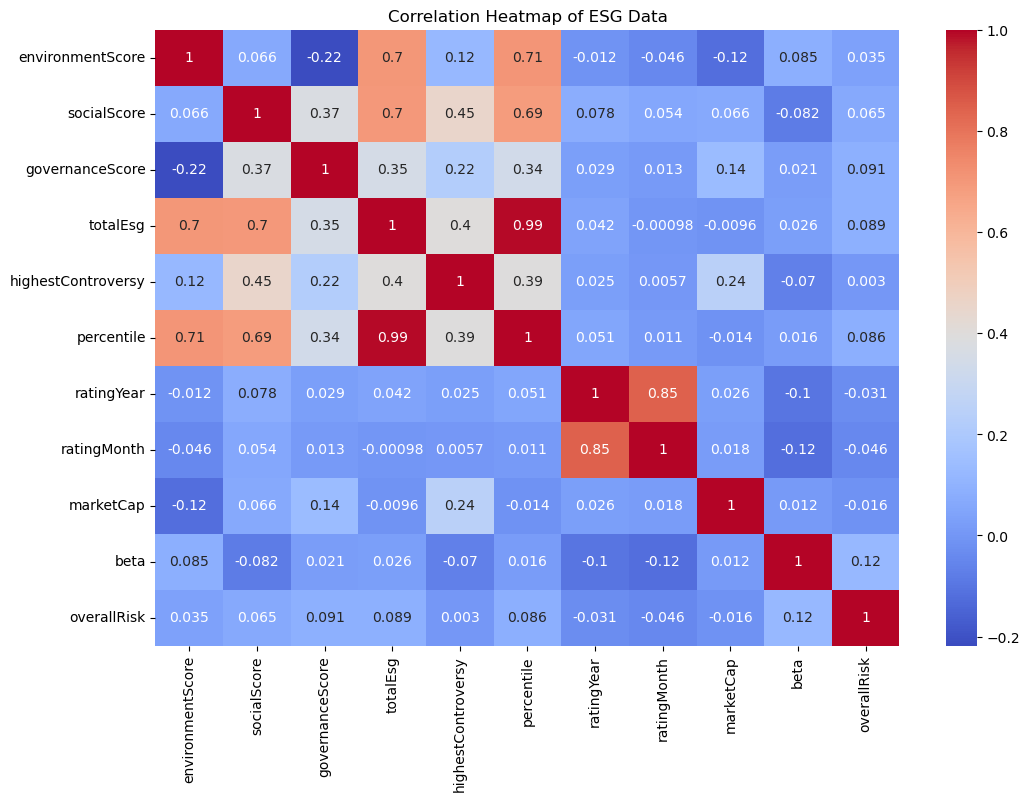

In [57]:
# fazendo a matriz de correlação, após r2 baixo
numeric_df = esg_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of ESG Data')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


# último teste: random forest

merged_df_clean = merged_df_unique.dropna(subset=['environmentScore', 'socialScore', 'governanceScore', 'totalEsg', 'Price'])
 

X = merged_df_clean[['environmentScore', 'socialScore', 'governanceScore', 'totalEsg']]
y = merged_df_clean['Price']
 
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
 
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
 

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
 

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 

y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)
 
print(f"Mean Squared Error (MSE): {mse_original}")
print(f"R-squared (R2): {r2_original}")

Mean Squared Error (MSE): 345502.0586466301
R-squared (R2): -0.5822984078955427


O código random forest acima foi usado como mera experimentação: um teste, já que o Linear Regression foi o escolhido durante o projeto. 
Entretando, diante das análises, fica evidente que o problema existe na baixa relação entre as variáveis independentes e a variável preditora. 